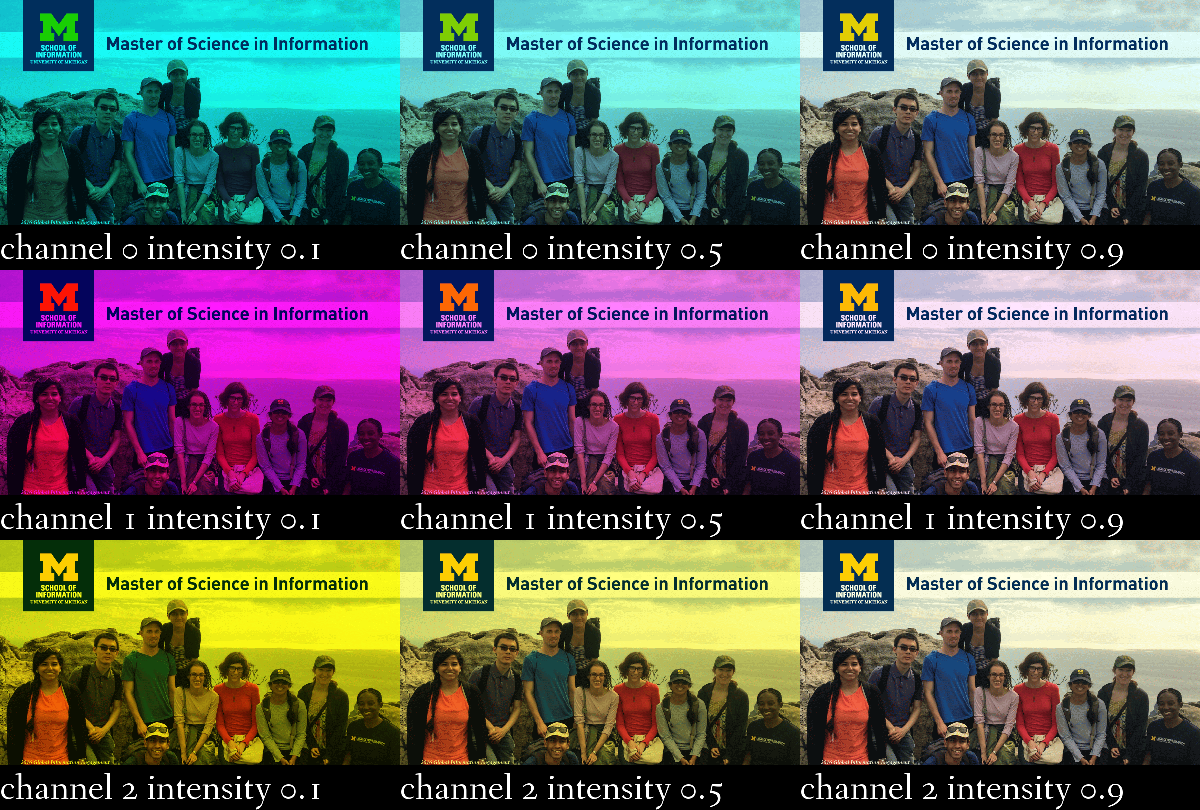

In [1]:
import PIL
from PIL import Image, ImageDraw, ImageFont, ImageEnhance

def modify_channel(image, channel, intensity):
    """Return a new image with the given channel modified by the given intensity.  (Slow?)"""
    result = Image.new(image.mode, (image.width, image.height))
    pixels = result.load()
    for row in range(image.height):
        for col in range(image.width):
            original = list(image.getpixel((col, row)))
            original[channel] = int(original[channel] * intensity)
            pixels[col, row] = tuple(original)
    return result

def add_footer(image, font, text):
    """Return a new image with the given text added to the bottom."""
    bounds = font.getsize(text)
    bounds = (max(image.width, bounds[0]), bounds[1])
    text_img = Image.new(image.mode, bounds, "black")
    text_draw = ImageDraw.Draw(text_img)
    text_draw.text((0, 0), text, font=font)
    result_size = (bounds[0], image.height + bounds[1])
    result = Image.new(image.mode, result_size)
    result.paste(image, (0, 0))
    result.paste(text_img, (0, image.height))
    return result

# read image and convert to RGB
image = Image.open("readonly/msi_recruitment.gif")
image = image.convert('RGB')

font = ImageFont.truetype("readonly/fanwood-webfont.ttf", 75)

# build a list of 9 images which have different channel intensities
channels = (0, 1, 2)
intensities = (0.1, 0.5, 0.9)
images = []
for channel in channels:
    for intensity in intensities:
        modified = modify_channel(image, channel, intensity)
        modified = add_footer(modified, font, f"channel {channel} intensity {intensity}")
        images.append(modified)

# create a contact sheet from different brightnesses
contact_sheet = Image.new(images[0].mode, (images[0].width * 3, images[0].height * 3))
x, y = 0, 0
for img in images:
    contact_sheet.paste(img, (x, y))
    if x + img.width == contact_sheet.width:
        x = 0
        y += img.height
    else:
        x += img.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((contact_sheet.width // 2,contact_sheet.height // 2))
display(contact_sheet)